In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 3.7 MB/s 
     |████████████████████████████████| 6.3 MB 32.7 MB/s 
     |████████████████████████████████| 16.7 MB 290 kB/s 


In [6]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd




sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.metrics as sklm 
from sklearn.metrics import silhouette_samples, silhouette_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
df=pd.read_csv('/content/drive/MyDrive/master dissertation/out2.csv',encoding= 'unicode_escape')

In [ ]:
df

,Unnamed: 0,New Code,Children_Poverty_Rate,E1,E2,E3,E4,E5,E6,HD1,HD2,L1,L2,O,P1,P2,P3,Q
0,0,E09000001,13.9,0.866591,79.632867,78.8,4.525342,75.265578,24.175824,4.4,3.4,83.704458,82.252816,12.000000,7.500000,77.500000,15.000000,6.2
1,1,E05000026,34.5,8.748906,60.348077,68.2,14.488238,58.350165,55.310621,5.1,4.3,82.132476,81.024825,28.472222,25.274725,69.963370,5.128205,14.3
2,2,E05000027,35.7,12.440191,63.107388,67.5,12.171738,59.268636,60.995185,8.8,6.7,78.301335,75.957605,33.538462,25.961538,63.461538,10.576923,5.8
3,3,E05000028,34.3,10.731821,61.192441,67.2,13.811543,57.896693,51.510574,8.8,7.0,78.721642,77.462207,32.571429,24.896266,66.390041,9.128631,7.7
4,4,E05000029,35.6,10.147133,63.639393,66.8,12.118492,58.675457,55.239787,9.8,6.8,80.335587,79.273343,30.172414,24.137931,60.591133,15.270936,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,620,E05000645,24.5,2.430556,75.190840,75.5,5.792197,71.130147,48.214286,7.1,5.7,83.591136,82.869666,24.000000,10.843373,74.096386,15.060241,6.4
621,621,E05000646,32.3,4.310175,69.016213,71.6,7.682863,66.101482,54.421769,7.0,5.6,82.557700,80.220817,28.787879,14.077670,72.815534,12.621359,7.7
622,622,E05000647,27.7,2.447761,73.767798,75.2,6.152557,70.557096,50.000000,6.0,5.2,84.391581,81.990857,24.347826,10.994764,76.963351,12.041885,7.7
623,623,E05000648,50.2,11.687827,58.998631,64.0,11.933333,56.404782,60.930233,10.7,8.7,77.968877,74.656310,47.692308,21.235521,69.884170,9.266409,7.4


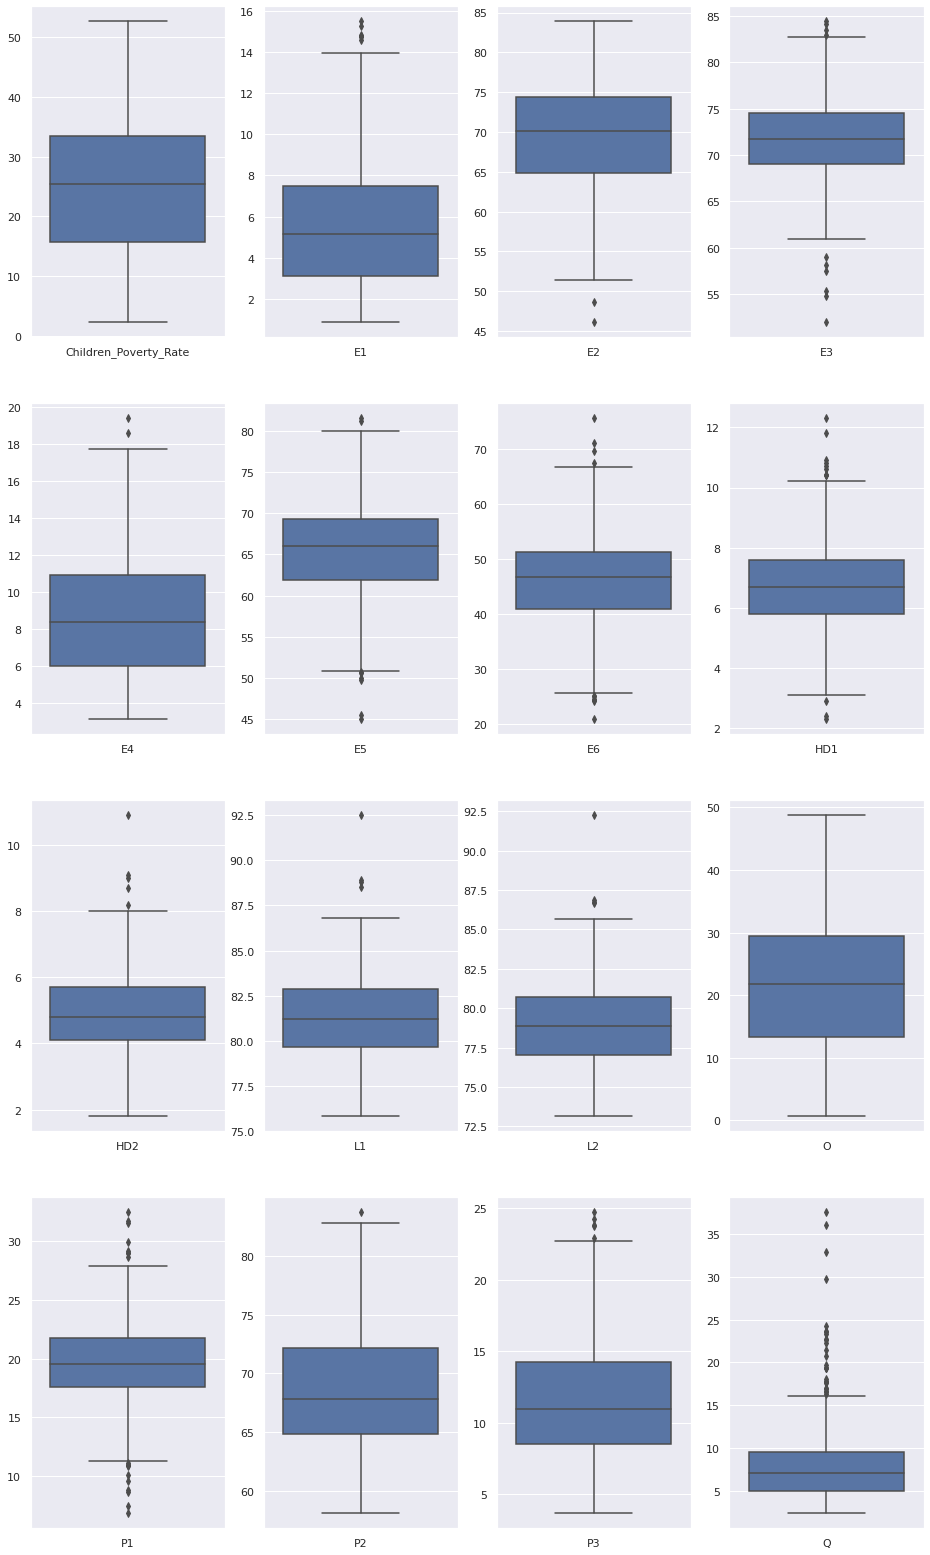

In [ ]:
sns.set(rc={'figure.figsize':(16,28)})
fig, axes = plt.subplots(4, 4)

sns.boxplot(data=df[['Children_Poverty_Rate']], ax=axes[0,0])
sns.boxplot(data=df[['E1']], ax=axes[0,1])
sns.boxplot(data=df[['E2']], ax=axes[0,2])
sns.boxplot(data=df[['E3']], ax=axes[0,3])
sns.boxplot(data=df[['E4']], ax=axes[1,0])
sns.boxplot(data=df[['E5']], ax=axes[1,1])
sns.boxplot(data=df[['E6']], ax=axes[1,2])
sns.boxplot(data=df[['HD1']], ax=axes[1,3])
sns.boxplot(data=df[['HD2']], ax=axes[2,0])
sns.boxplot(data=df[['L1']], ax=axes[2,1])
sns.boxplot(data=df[['L2']], ax=axes[2,2])
sns.boxplot(data=df[['O']], ax=axes[2,3])
sns.boxplot(data=df[['P1']], ax=axes[3,0])
sns.boxplot(data=df[['P2']], ax=axes[3,1])
sns.boxplot(data=df[['P3']], ax=axes[3,2])
sns.boxplot(data=df[['Q']], ax=axes[3,3])


In [7]:
London_ward2 = gpd.read_file('/content/drive/MyDrive/master dissertation/ESRI/London_Ward_CityMerged.shp')

In [10]:
London_joind = London_ward2.merge(df,left_on = 'GSS_CODE', right_on ='New Code')

In [11]:
c1= London_ward2[London_ward2['GSS_CODE'] =='E09000001']
city_of_london = c1

(500648.735, 564876.965, 153596.64500000002, 203188.055)

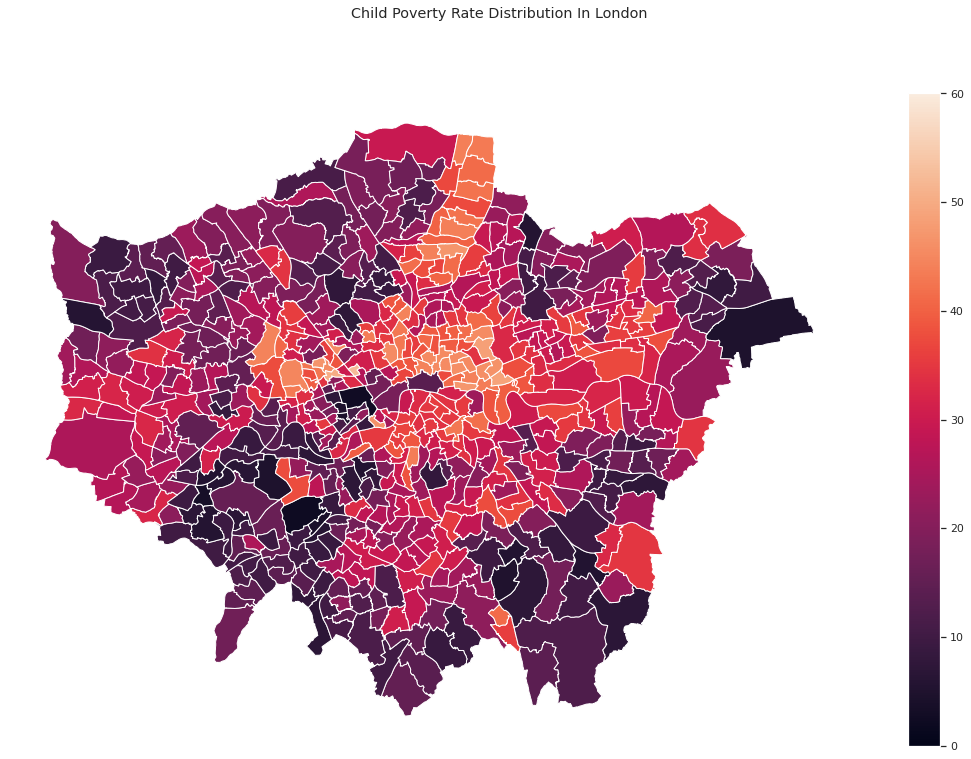

In [13]:
fig, ax = plt.subplots(1,1, figsize=(20,12))
fig.suptitle('Child Poverty Rate Distribution In London')
London_joind.plot(ax=ax, column='Children_Poverty_Rate',legend=True, vmin = 0, vmax = 60)
ax.axis('off') 

(500648.735, 564876.965, 153596.64499999996, 203188.055)

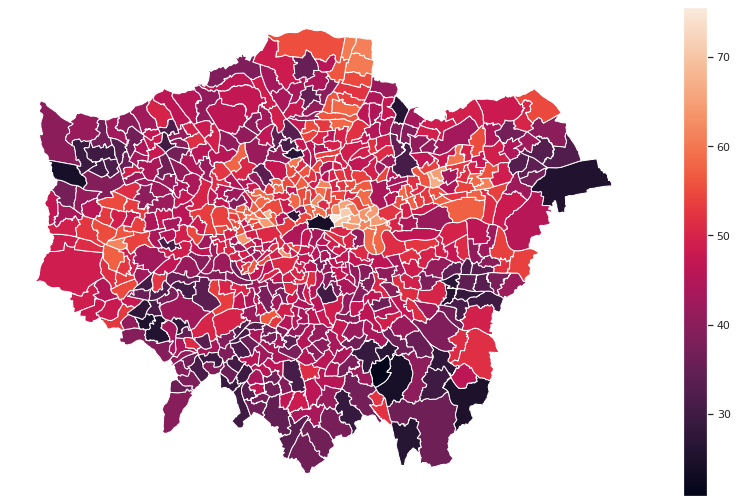

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,9))
London_joind.plot(ax=ax, column='E6',legend=True)
ax.axis('off') 

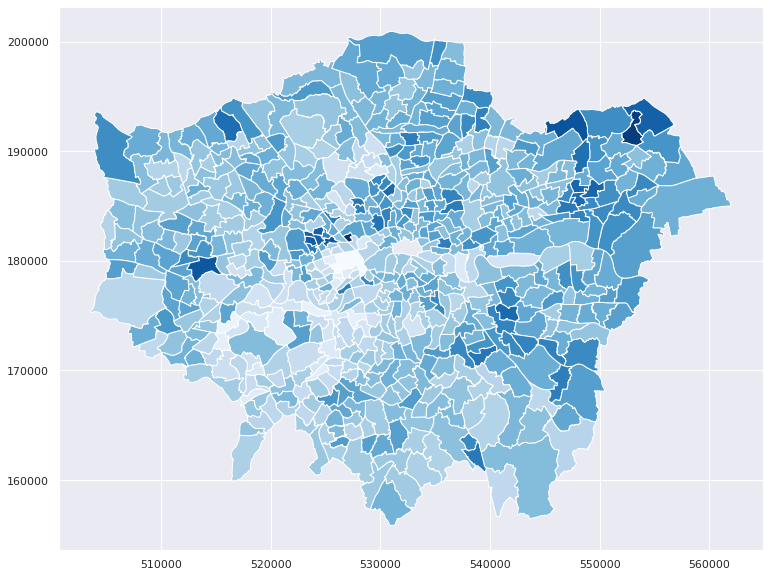

In [ ]:
joined.plot("HD1", cmap="Blues", figsize=(20,10))  

(500648.62694999995, 564876.90205, 153596.64335, 203188.04565000001)

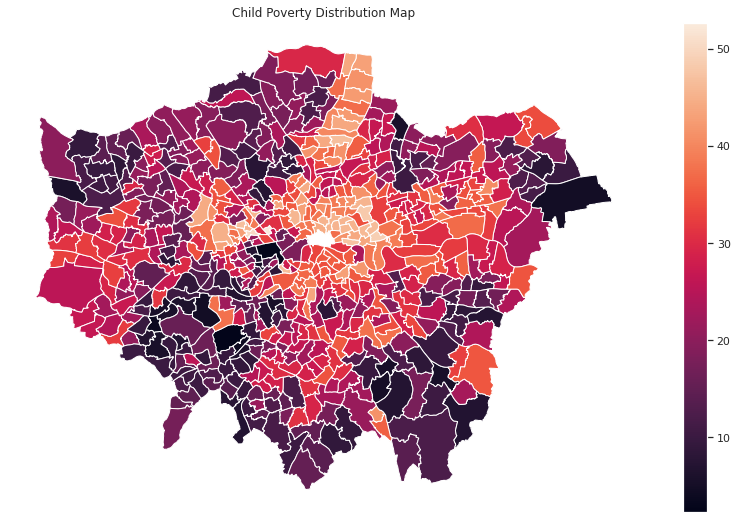

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,9))
color_sequence = ['#1f77b4', '#aec7e8']
joined.plot(ax=ax, column='Children_Poverty_Rate',legend=True)


#ax.get_legend().set_title("clusters")  #set the legend title
plt.title('Child Poverty Distribution Map')
ax.axis('off') 

(500648.62694999995, 564876.90205, 153596.64335, 203188.04565000001)

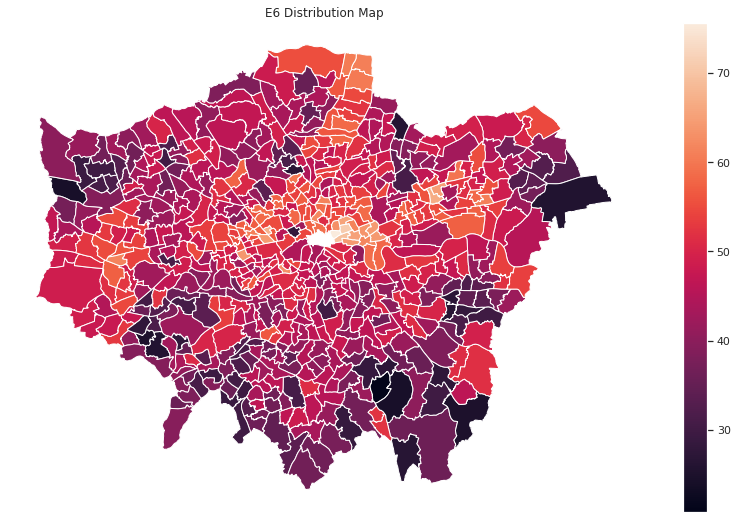

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,9))
color_sequence = ['#1f77b4', '#aec7e8']
joined.plot(ax=ax, column='E6',legend=True)


#ax.get_legend().set_title("clusters")  #set the legend title
plt.title('E6 Distribution Map')
ax.axis('off') 

In [ ]:
pd.concat([df['New Code'],London_joind['GSS_CODE']]).drop_duplicates(keep=False)

625    E12000007
626    E92000001
627    K04000001
dtype: object

In [ ]:
ward = gpd.read_file('/content/drive/MyDrive/master dissertation/infuse_ward_lyr_2011/infuse_ward_lyr_2011.shp')

In [ ]:
ward = ward.drop(['geo_label', 'geo_labelw','label'], axis=1)

In [ ]:
ward_add = pd.DataFrame()

In [ ]:
new_row1 = {'geo_code':'E09000001', 'name':'City of London', 'geometry':}

In [ ]:
joined = ward.merge(df,left_on = 'geo_code', right_on ='New Code')

In [ ]:
joined['geo_code']

0      E05000251
1      E05000232
2      E05000605
3      E05000063
4      E05000449
         ...    
619    E05000507
620    E05000119
621    E05000030
622    E05000302
623    E05000580
Name: geo_code, Length: 624, dtype: object

In [ ]:
df['New Code']

0      E09000001
1      E05000026
2      E05000027
3      E05000028
4      E05000029
         ...    
623    E05000648
624    E05000649
625    E12000007
626    E92000001
627    K04000001
Name: New Code, Length: 628, dtype: object

In [ ]:
pd.concat([df['New Code'],London_joind['GSS_CODE']]).drop_duplicates(keep=False)

0      E09000001
625    E12000007
626    E92000001
627    K04000001
dtype: object